In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = None

In [3]:
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/dataset/"

# Use os.path.join to concatenate the folder and file paths
file_path = os.path.join(folder, 'loan_data_2007_2014_preprocessed.csv')

# Read the CSV file with the index_col parameter specified
loan_data_preprocessed_backup = pd.read_csv(file_path, index_col=0, low_memory=False)

## Explore Dataset

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [5]:
sorted(loan_data_preprocessed.columns.values)
# Displays all column names.

['acc_now_delinq',
 'addr_state',
 'addr_state:AK',
 'addr_state:AL',
 'addr_state:AR',
 'addr_state:AZ',
 'addr_state:CA',
 'addr_state:CO',
 'addr_state:CT',
 'addr_state:DC',
 'addr_state:DE',
 'addr_state:FL',
 'addr_state:GA',
 'addr_state:HI',
 'addr_state:IA',
 'addr_state:ID',
 'addr_state:IL',
 'addr_state:IN',
 'addr_state:KS',
 'addr_state:KY',
 'addr_state:LA',
 'addr_state:MA',
 'addr_state:MD',
 'addr_state:ME',
 'addr_state:MI',
 'addr_state:MN',
 'addr_state:MO',
 'addr_state:MS',
 'addr_state:MT',
 'addr_state:NC',
 'addr_state:NE',
 'addr_state:NH',
 'addr_state:NJ',
 'addr_state:NM',
 'addr_state:NV',
 'addr_state:NY',
 'addr_state:OH',
 'addr_state:OK',
 'addr_state:OR',
 'addr_state:PA',
 'addr_state:RI',
 'addr_state:SC',
 'addr_state:SD',
 'addr_state:TN',
 'addr_state:TX',
 'addr_state:UT',
 'addr_state:VA',
 'addr_state:VT',
 'addr_state:WA',
 'addr_state:WI',
 'addr_state:WV',
 'addr_state:WY',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_typ

In [6]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off',
                                                                                        'Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [7]:
loan_data_defaults.tail().T

id,9856168,9835883,9695736,9007579,9684700
member_id,11708132,9309502,11547808,10799568,11536848
loan_amnt,6000,15000,8525,18000,22000
funded_amnt,6000,15000,8525,18000,22000
funded_amnt_inv,6000.0,15000.0,8525.0,17975.0,22000.0
term,60 months,36 months,60 months,36 months,60 months
int_rate,23.4,16.99,18.25,7.9,19.97
installment,170.53,534.72,217.65,563.23,582.5
grade,E,D,D,A,D
sub_grade,E5,D1,D3,A4,D5
emp_title,NaN,NaN,MANAGER,sales rep,Chief of Interpretation (Park Ranger)


In [8]:
loan_data_preprocessed.shape

(466285, 205)

In [9]:
loan_data_defaults.shape

(43236, 205)

In [10]:
loan_data_defaults.isnull().sum()

member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                                         0
annual_inc                                                             0
verification_status                                

## Independent Variable

In [11]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\1952283613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\1952283613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


## Dependent Variable

In [12]:
loan_data_defaults[['recoveries', 'funded_amnt']].sample(5)

,recoveries,funded_amnt
id,,
9036173,2250.15,16425
837126,248.63,4800
1153711,341.41,10000
12456819,3401.26,24000
220873,295.54,10000


In [13]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\2670870593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [14]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [15]:
loan_data_defaults[loan_data_defaults['recovery_rate'] == 0.0][['recoveries', 'funded_amnt']].sample(5)

,recoveries,funded_amnt
id,,
28082309,0.0,14700
2310046,0.0,5000
8816043,0.0,21850
8406678,0.0,10000
5405211,0.0,25000


In [16]:
loan_data_defaults[loan_data_defaults['recovery_rate'] > 1.0][['recoveries', 'funded_amnt']].sample(5)

,recoveries,funded_amnt
id,,
9845644,8303.74,7350
1127375,2472.00,2100
365044,6272.43,6000
2286330,1516.38,1500
2234851,6307.77,5700


In [17]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\1169471315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\1169471315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recov

## Explore Dependent Variable

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

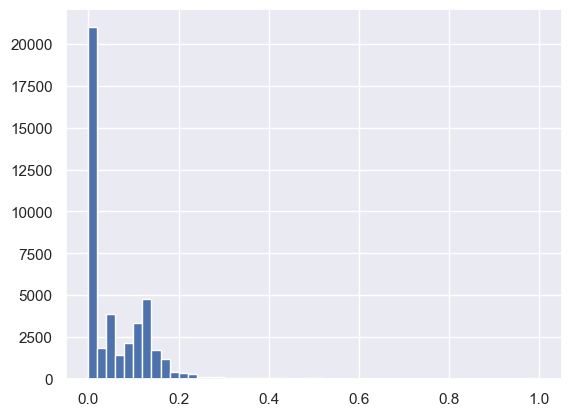

In [19]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50);
# We plot a histogram of a variable with 50 bins.

In [20]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_18168\3193898076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
X = loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1'], axis = 1)
y = loan_data_defaults[['recovery_rate_0_1']]
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(X, y,
                                                                                                                          test_size = 0.2,
                                                                                                                          random_state = 42)

In [23]:
lgd_inputs_stage_1_train.shape, lgd_inputs_stage_1_test.shape

((34588, 205), (8648, 205))

### Preparing Inputs

In [24]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [25]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [26]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [27]:
lgd_inputs_stage_1_train.shape

(34588, 49)

In [28]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [29]:
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

## Stage 1 - Logistic Model

### Stage 1 - Estimating with Model

In [30]:
from sklearn import linear_model
from scipy import stats

In [31]:
class LogisticRegressionWithPValues:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        
        # Calculating p-values for coefficients
        denom = 2.0 * (1.0 + np.cosh(self.model.decision_function(X)))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]
        
        # Store model attributes
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

        # return self

In [32]:
def create_summary_table(reg, inputs_train):
    # Get the coefficients and feature names
    coefficients = reg.coef_[0]
    feature_names = inputs_train.columns

    # Get the intercept
    intercept = reg.intercept_[0]

    # Create DataFrames for coefficients and intercept
    coef_df = pd.DataFrame({'Feature name': feature_names, 'Coefficients': coefficients})
    intercept_df = pd.DataFrame({'Feature name': ['Intercept'], 'Coefficients': [intercept]})

    # Concatenate the intercept DataFrame at the 0th location
    summary_table = pd.concat([intercept_df, coef_df]).reset_index(drop=True)

    # Get p-values
    p_values = reg.p_values
    p_values = np.append(np.nan, p_values)
    summary_table['p_values'] = p_values

    return summary_table

In [33]:
reg_lgd_st_1 = LogisticRegressionWithPValues(max_iter=1000)
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train.values.ravel())

In [34]:
summary_table = create_summary_table(reg_lgd_st_1, lgd_inputs_stage_1_train)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-3.021654e-04,NaN
1,grade:A,-3.531957e-05,9.996706e-01
2,grade:B,-1.783396e-04,9.979381e-01
3,grade:C,-3.072816e-04,9.963129e-01
4,grade:D,1.822698e-05,9.997898e-01
5,grade:E,2.429871e-05,9.997458e-01
6,grade:F,1.517188e-04,9.986183e-01
7,home_ownership:MORTGAGE,-7.916738e-05,9.975282e-01
8,home_ownership:NONE,1.845679e-06,9.999982e-01
9,home_ownership:OTHER,2.574238e-07,9.999995e-01


### Stage 1 - Testing the model

In [35]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [36]:
# Predict using the model
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)[:, 1]

# Prepare a DataFrame with actual targets and predicted probabilities
df_actual_predicted_probs = pd.DataFrame({
    'lgd_targets_stage_1_test': lgd_targets_stage_1_test.reset_index(drop=True).values.ravel(),
    'y_hat_test_proba_lgd_stage_1': y_hat_test_proba_lgd_stage_1
}, index=lgd_targets_stage_1_test.index)

df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
id,,
2382805,1,0.564768
8597067,1,0.626877
6715387,0,0.451072
10111118,1,0.547143
34423403,0,0.410870


### Stage 1 - Estimating the accuracy

In [37]:
tr = 0.5
# Create a binary prediction based on the threshold
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

# Calculate and display the confusion matrix
confusion_matrix = pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'],
                               rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted     0     1
Actual               
0          1463  2299
1           994  3892


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [39]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],
                                 df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

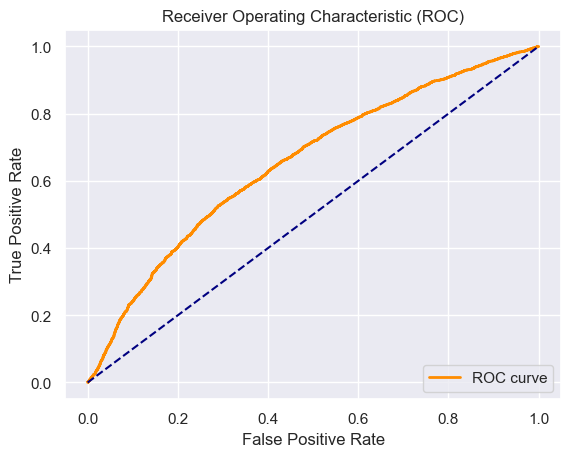

Area under ROC curve (AUROC): 0.6540126581975474


In [40]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUROC
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
print('Area under ROC curve (AUROC):', AUROC)

### Stage 1 - Saving the model

In [41]:
# Define the folder path
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/mywork/model/"

# Pickle and save the model
print(f"Saving the model ...")
with open(os.path.join(folder, 'lgd_model_stage_1.sav'), 'wb') as file:
    pickle.dump(reg_lgd_st_1, file)
print(f"Sucessfully saved the model!!!")

Saving the model ...
Sucessfully saved the model!!!


## Stage 2 - Linear Model

### Stage 2 - Estimating with model

In [42]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [43]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
X = lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1'], axis = 1)
y = lgd_stage_2_data[['recovery_rate']]
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(X, y,
                                                                                                                          test_size = 0.2,
                                                                                                                          random_state = 42)

In [44]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)

In [45]:
import statsmodels.api as sm

class LinearRegressionWithPValues:
    def __init__(self):
        self.model = None
        self.p_values = None

    def fit(self, X, y):
        X = sm.add_constant(X)  # Add a constant term for the intercept
        self.model = sm.OLS(y, X).fit()

        # Calculate p-values for coefficients
        self.p_values = self.model.pvalues[1:]  # Exclude the intercept term

    def predict(self, X):
        X = sm.add_constant(X)
        return self.model.predict(X)

In [46]:
lgd_targets_stage_2_train.head()

,recovery_rate
id,
37751581,0.174157
1172006,0.037034
1690331,0.259313
1681667,0.055503
22263441,0.139995


In [47]:
reg_lgd_st_2 = LinearRegressionWithPValues()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train.values)

In [48]:
def create_summary_table_linear(reg, inputs_train):
    # Get the coefficients and feature names
    coefficients = reg.model.params
    feature_names = ['Intercept'] + list(inputs_train.columns)

    # Get p-values
    p_values = reg.p_values
    p_values = [np.nan] + list(p_values)

    # Create a DataFrame for coefficients and p-values
    summary_table = pd.DataFrame({'Feature name': feature_names, 'Coefficients': coefficients, 'p_values': p_values}).reset_index(drop=True)

    return summary_table

In [49]:
summary_table = create_summary_table_linear(reg_lgd_st_2, lgd_inputs_stage_2_train)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.416866e-01,NaN
1,grade:A,-6.881356e-02,3.700745e-12
2,grade:B,-5.124579e-02,1.389605e-10
3,grade:C,-3.779864e-02,2.492682e-08
4,grade:D,-2.740174e-02,3.078571e-06
5,grade:E,-1.332029e-02,1.150961e-02
6,grade:F,-5.320410e-03,3.055454e-01
7,home_ownership:MORTGAGE,2.825883e-03,6.107111e-02
8,home_ownership:NONE,1.455564e-01,9.447202e-05
9,home_ownership:OTHER,-9.554322e-03,6.409426e-01


### Stage 2 - Testing the model

In [50]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)

In [51]:
# Make predictions
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [52]:
y_hat_test_lgd_stage_2.head()

id
1151009     0.094072
22432231    0.154145
10085880    0.130883
778997      0.083021
1179484     0.077086
dtype: float64

In [53]:
lgd_targets_stage_2_test.head()

,recovery_rate
id,
1151009,0.033254
22432231,0.156128
10085880,0.181260
778997,0.035356
1179484,0.046756


In [54]:
# Reset the index of lgd_targets_stage_2_test
lgd_targets_stage_2_test = lgd_targets_stage_2_test.reset_index(drop=True).values.ravel()

# Create a DataFrame with both actual and predicted values
results_df = pd.DataFrame({'Actual': lgd_targets_stage_2_test, 'Predicted': y_hat_test_lgd_stage_2})
results_df

,Actual,Predicted
id,,
1151009,0.033254,0.094072
22432231,0.156128,0.154145
10085880,0.181260,0.130883
778997,0.035356,0.083021
1179484,0.046756,0.077086
2124588,0.079739,0.072243
795498,0.757192,0.064220
685450,0.041769,0.074724
16492956,0.005714,0.143066


### Stage 2 - Estimating the residual

In [ ]:
# Calculate the correlation between actual and predicted values
correlation = results_df.corr()
print(correlation)

In [ ]:
# Visualize the distribution of residuals (the difference between actual and predicted values)
residuals = lgd_targets_stage_2_test - y_hat_test_lgd_stage_2
sns.displot(residuals, kde = True);

### Stage 2 - Saving the model

In [ ]:
# Define the folder path
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/mywork/model/"

# Pickle and save the model
print(f"Saving the model ...")
with open(os.path.join(folder, 'lgd_model_stage_2.sav'), 'wb') as file:
    pickle.dump(reg_lgd_st_2, file)
print(f"Sucessfully saved the model!!!")

## Combining the models

In [ ]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [ ]:
y_hat_test_lgd_stage_2.shape, y_hat_test_lgd_stage_1.shape

In [ ]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2
# Here we combine the predictions of the models from the two stages.

In [ ]:
pd.DataFrame(y_hat_test_lgd)

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

In [ ]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()